# Evaluation Metrics for Classification - Churn Prediction

In [71]:
# Toolbox
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Model Training

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [73]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.churn = (df.churn == 'yes').astype(int)

In [74]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

y_train = df_train.churn.values
y_val = df_val.churn.values

del df_train['churn']
del df_val['churn']

In [75]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [76]:
train_dict = df_train[categorical + numerical].to_dict(orient='rows')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(


In [77]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [78]:
val_dict = df_val[categorical + numerical].to_dict(orient='rows')
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)[:, 1]

/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(


In [79]:
small_subset = ['contract', 'tenure', 'totalcharges']
train_dict_small = df_train[small_subset].to_dict(orient='rows')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(


LogisticRegression(random_state=1, solver='liblinear')

In [80]:
val_dict_small = df_val[small_subset].to_dict(orient='rows')
X_small_val = dv_small.transform(val_dict_small)

y_pred_small = model_small.predict_proba(X_small_val)[:, 1]

/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(


## Classification Accuracy

In [81]:
# Calculates the fraction of correct predictions
# Gets the predictions from the model
# Makes "hard" predictions
# Computes the accuracy
y_pred = model.predict_proba(X_val)[:, 1]
churn = y_pred >= 0.5 
(churn == y_val).mean() 

0.8016129032258065

In [82]:
from sklearn.metrics import accuracy_score

In [83]:
accuracy_score(y_val, y_pred >= 0.5)

0.8016129032258065

In [84]:
thresholds = np.linspace(0, 1, 11)
thresholds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [85]:
# Loops over the different thresholds and checks for one which gives the best accuracy
#A Creates an array with different thresholds: 0.0, 0.1, 0.2, etc.
#B Loops over each threshold value.
#C Uses the accuracy_score function from scikit-learn for computing accuracy.
#D Prints the thresholds and the accuracy values to standard output.
thresholds = np.linspace(0, 1, 21) #A

accuracies = []

for t in thresholds: #B
    acc = accuracy_score(y_val, y_pred >= t) #C
    accuracies.append(acc)
    print('%0.2f %0.3f' % (t, acc)) #D

0.00 0.261
0.05 0.501
0.10 0.595
0.15 0.640
0.20 0.690
0.25 0.730
0.30 0.755
0.35 0.767
0.40 0.782
0.45 0.795
0.50 0.802
0.55 0.790
0.60 0.790
0.65 0.788
0.70 0.774
0.75 0.752
0.80 0.742
0.85 0.739
0.90 0.739
0.95 0.739
1.00 0.739


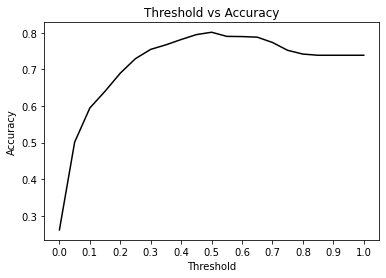

In [86]:
plt.figure(figsize=(6, 4))

plt.plot(thresholds, accuracies, color='black')

plt.title('Threshold vs Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')

plt.xticks(np.linspace(0, 1, 11))

# plt.savefig('04_threshold_accuracy.svg')

plt.show()

In [87]:
# Predicts churn using the small model
churn_small = y_pred_small >= 0.5
(churn_small == y_val).mean()

0.7672043010752688

In [88]:
# Calculates the accuracy of the predictions
accuracy_score(y_val, churn_small)

0.7672043010752688

## Dummy Baseline

In [89]:
# Creates baseline prediction
#A Gets the number of customers in the validation set
#B Creates an array with only False elements
size_val = len(y_val) #A
baseline = np.repeat(False, size_val) #B
baseline

array([False, False, False, ..., False, False, False])

In [90]:
accuracy_score(baseline, y_val)

0.7387096774193549

## Confusion Table

In [91]:
# Calculates the confusion table
#A Calculates true positives (cases where churn is correctly predicted)
#B Calculates false positives (cases where churn is predicted but the customers didn't churn)
#C Calculates false negatives (cases where no churn is predicted but the customers churned)
#D Calculates true negatives (cases where no churn is correctly predicted)
true_positive = ((y_pred >= 0.5) & (y_val == 1)).sum() #A
false_positive = ((y_pred >= 0.5) & (y_val == 0)).sum() #B
false_negative = ((y_pred < 0.5) & (y_val == 1)).sum() #C
true_negative = ((y_pred < 0.5) & (y_val == 0)).sum() #D

In [92]:
confusion_table = np.array(
     # predict neg    pos
    [[true_negative, false_positive], # actual neg
     [false_negative, true_positive]]) # actual pos

confusion_table

array([[1202,  172],
       [ 197,  289]])

In [93]:
confusion_table / confusion_table.sum()

array([[0.64623656, 0.09247312],
       [0.10591398, 0.15537634]])

## Precision and Recall

In [94]:
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
precision, recall

(0.6268980477223427, 0.5946502057613169)

In [95]:
confusion_table / confusion_table.sum()

array([[0.64623656, 0.09247312],
       [0.10591398, 0.15537634]])

In [96]:
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
precision, recall

(0.6268980477223427, 0.5946502057613169)

## Receiver Operating Characteristic (ROC) Curve & Area Under the Curve (AUC) Score

### True Positive Rate (TPR) and False Positive Rate (FPR)

In [97]:
# Evaluates the model at multiple thresholds
#A Creates a list where the results are kept
#B Create an array with different threshold values and loop over them
#C Compute the confusion table for predictions at each threshold
#D Appends the results to the scores list
scores = [] #A

thresholds = np.linspace(0, 1, 101) #B

for t in thresholds: #B
    tp = ((y_pred >= t) & (y_val == 1)).sum() #C
    fp = ((y_pred >= t) & (y_val == 0)).sum() #C
    fn = ((y_pred < t) & (y_val == 1)).sum() #C
    tn = ((y_pred < t) & (y_val == 0)).sum() #C
    scores.append((t, tp, fp, fn, tn)) #D

In [98]:
#A Turns the list into a Pandas dataframe
#B Assigns names to the columns of the dataframe
df_scores = pd.DataFrame(scores) #A
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn'] #B

In [99]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,486,1374,0,0
10,0.1,458,726,28,648
20,0.2,421,512,65,862
30,0.3,380,350,106,1024
40,0.4,337,257,149,1117
50,0.5,289,172,197,1202
60,0.6,200,105,286,1269
70,0.7,99,34,387,1340
80,0.8,7,1,479,1373
90,0.9,0,0,486,1374


In [100]:
# Compute the TPR and FPR scores for all values in the dataframe
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [101]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,458,726,28,648,0.942387,0.528384
20,0.2,421,512,65,862,0.866255,0.372635
30,0.3,380,350,106,1024,0.781893,0.254731
40,0.4,337,257,149,1117,0.693416,0.187045
50,0.5,289,172,197,1202,0.594650,0.125182
60,0.6,200,105,286,1269,0.411523,0.076419
70,0.7,99,34,387,1340,0.203704,0.024745
80,0.8,7,1,479,1373,0.014403,0.000728
90,0.9,0,0,486,1374,0.000000,0.000000


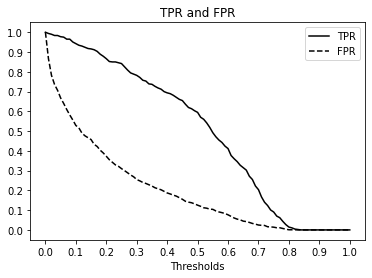

In [102]:
plt.figure(figsize=(6, 4))

plt.plot(df_scores.threshold, df_scores.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR')

# plt.savefig('04_fpr_tpr_plot.svg')

plt.show()

## Random Baseline Model

In [103]:
# Function for calculating TPR and FPR at different thresholds
#A Defines a function that takes in actual and predicted values
#B Calculate the confusion table for the different thresholds
#C Convert the confusion table numbers to a dataframe.
#D Calculates TPR and FPR using the confusion table numbers
#E Returns the resulting dataframe
def tpr_fpr_dataframe(y_val, y_pred): #A
    scores = [] #B

    thresholds = np.linspace(0, 1, 101) #B

    for t in thresholds:
        tp = ((y_pred >= t) & (y_val == 1)).sum() #B
        fp = ((y_pred >= t) & (y_val == 0)).sum() #B
        fn = ((y_pred < t) & (y_val == 1)).sum() #B
        tn = ((y_pred < t) & (y_val == 0)).sum() #B

        scores.append((t, tp, fp, fn, tn)) #B

    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn'] #C

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn) #D
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn) #D

    return df_scores #E

In [104]:
#A Fixes the random seed for reproducibility
#B Generate an array with random numbers between 0 and 1
np.random.seed(1) #A
y_rand = np.random.uniform(0, 1, size=len(y_val)) #B
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,440,1236,46,138,0.905350,0.899563
20,0.2,392,1101,94,273,0.806584,0.801310
30,0.3,339,972,147,402,0.697531,0.707424
40,0.4,288,849,198,525,0.592593,0.617904
50,0.5,239,723,247,651,0.491770,0.526201
60,0.6,193,579,293,795,0.397119,0.421397
70,0.7,152,422,334,952,0.312757,0.307132
80,0.8,98,302,388,1072,0.201646,0.219796
90,0.9,57,147,429,1227,0.117284,0.106987


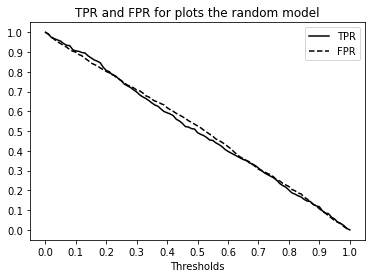

In [107]:
plt.figure(figsize=(6, 4))

plt.plot(df_rand.threshold, df_rand.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR for plots the random model')

#plt.savefig('04_fpr_tpr_plot_random.svg')

plt.show()

## Ideal Baseline Model

In [108]:
#A Calculates the number of negative and positive examples in the dataset
#B Generates an array that repeats 0s num_neg number of times, followed by 1s repeated num_pos number of times
#C Generates the predictions of the "model" i.e. numbers that grow from 0 in the first cell to 1 in the last
#D Computes the TPR and FPR curves for the classifier
num_neg = (y_val == 0).sum() #A
num_pos = (y_val == 1).sum() #B

y_ideal = np.repeat([0, 1], [num_neg, num_pos]) #B
y_pred_ideal = np.linspace(0, 1, num_neg + num_pos) #C

df_ideal = tpr_fpr_dataframe(y_ideal, y_pred_ideal) #D
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,486,1188,0,186,1.000000,0.864629
20,0.2,486,1002,0,372,1.000000,0.729258
30,0.3,486,816,0,558,1.000000,0.593886
40,0.4,486,630,0,744,1.000000,0.458515
50,0.5,486,444,0,930,1.000000,0.323144
60,0.6,486,258,0,1116,1.000000,0.187773
70,0.7,486,72,0,1302,1.000000,0.052402
80,0.8,372,0,114,1374,0.765432,0.000000
90,0.9,186,0,300,1374,0.382716,0.000000


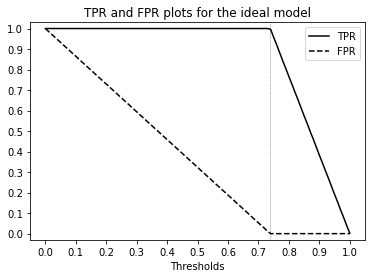

In [109]:
plt.figure(figsize=(6, 4))

plt.plot(df_ideal.threshold, df_ideal.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.vlines(1 - y_val.mean(), -1, 2, linewidth=0.5, linestyle='dashed', color='grey')
plt.ylim(-0.03, 1.03)

plt.xlabel('Thresholds')
plt.title('TPR and FPR plots for the ideal model')

# plt.savefig('04_fpr_tpr_plot_ideal.svg')

plt.show()

### ROC Curve

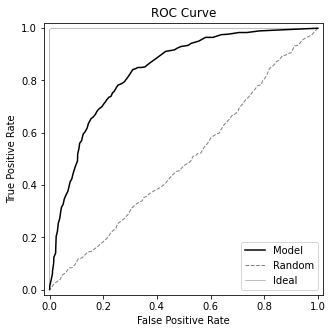

In [111]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, color='black', label='Model')
plt.plot(df_rand.fpr, df_rand.tpr, color='black', lw=1,
         linestyle='dashed', alpha=0.5, label='Random')
plt.plot(df_ideal.fpr, df_ideal.tpr, color='black', lw=0.5,
         linestyle='solid', alpha=0.5, label='Ideal')

plt.legend()

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

# plt.savefig('04_roc_curve_with_baselines.svg')

plt.show()

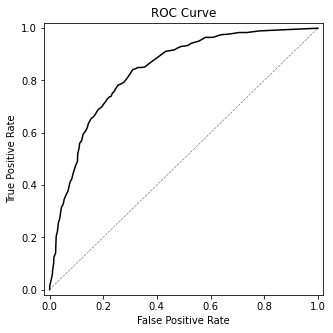

In [112]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

# plt.savefig('04_roc_curve.svg')

plt.show()

### ROC Curve plot using Scikit-Learn

In [113]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [114]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

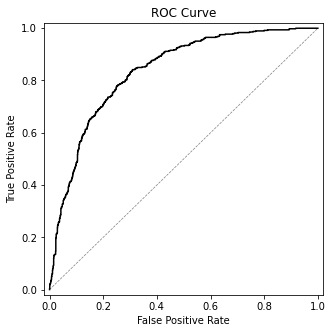

In [115]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.show()

### AUC: Area under the ROC curve

In [116]:
df_scores_small = tpr_fpr_dataframe(y_val, y_pred_small)

In [117]:
auc(df_scores.fpr, df_scores.tpr)

0.8359001084215382

In [118]:
auc(df_scores_small.fpr, df_scores_small.tpr)

0.8108718050089552

### Comparing Multiple Models with ROC Curves

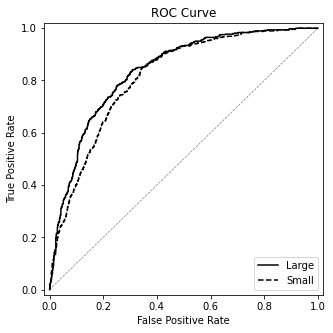

In [119]:
fpr_large, tpr_large, _ = roc_curve(y_val, y_pred)
fpr_small, tpr_small, _ = roc_curve(y_val, y_pred_small)

plt.figure(figsize=(5, 5))

plt.plot(fpr_large, tpr_large, color='black', linestyle='solid', label='Large')
plt.plot(fpr_small, tpr_small, color='black', linestyle='dashed', label='Small')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.show()

In [120]:
from sklearn.metrics import roc_auc_score

In [121]:
roc_auc_score(y_val, y_pred)

0.8363396349608545

In [122]:
roc_auc_score(y_val, y_pred_small)

0.8117942866042492

### AUC Interpretation: the probability that a randomly chosen positive example ranks higher than a randomly chosen negative example

In [123]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

np.random.seed(1)
neg_choice = np.random.randint(low=0, high=len(neg), size=10000)
pos_choice = np.random.randint(low=0, high=len(pos), size=10000)
(pos[pos_choice] > neg[neg_choice]).mean()

0.8356

## Parameter Tuning

In [124]:
# Function for training the model
#A Apply One-Hot encoding
#B Train the model
def train(df, y):
    cat = df[categorical + numerical].to_dict(orient='rows') #A
    
    dv = DictVectorizer(sparse=False) #A
    dv.fit(cat)

    X = dv.transform(cat) #A

    model = LogisticRegression(solver='liblinear') #B
    model.fit(X, y) #B

    return dv, model

In [125]:
# Function for applying the model to new data
#A Apply the same one-hot encoding scheme as in training
#B Usesthe model to make predictions
def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='rows') #A
    
    X = dv.transform(cat) #A

    y_pred = model.predict_proba(X)[:, 1] #B

    return y_pred

### K-fold Cross-validation

In [126]:
from sklearn.model_selection import KFold

In [127]:
# Splits the data into 10 parts
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [128]:
#A Creates a list for storing the results
#B Iterates over the 10 different splits of the data
#C Split the data into training and validation sets
#D Train the model and make predictions
#E Evaluates the quality of the training model on the validation data using AUC
#F Saves the AUC to the list with the results
aucs = [] #A

for train_idx, val_idx in kfold.split(df_train_full): #B
    df_train = df_train_full.iloc[train_idx] #C
    y_train = df_train.churn.values #C

    df_val = df_train_full.iloc[val_idx] #C
    y_val = df_val.churn.values #C

    dv, model = train(df_train, y_train) #D
    y_pred = predict(df_val, dv, model) #D

    rocauc = roc_auc_score(y_val, y_pred) #E
    aucs.append(rocauc) #F

/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(
/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(
/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(
/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/c

In [129]:
np.array(aucs).round(3)

array([0.849, 0.841, 0.859, 0.833, 0.824, 0.841, 0.844, 0.822, 0.845,
       0.861])

In [130]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.842 ± 0.012


### Finding the best parameters: Tuning the "C" parameter

In [131]:
# Function for training the model with parameter C for controlling regularization
#A Adds an extra parameter to the train function
#D Uses this parameter during training
def train(df, y, C=1.0): #A
    cat = df[categorical + numerical].to_dict(orient='rows')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=C) #B
    model.fit(X, y)

    return dv, model

In [132]:
# Function for tuning the model i.e. selecting the best parameter C using cross-validation
nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)

for C in [0.001, 0.01, 0.1, 0.5, 1, 10]:
    aucs = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)

    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(
/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(
/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(
/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/c

C=0.001, auc = 0.825 ± 0.013


/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(
/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(
/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(
/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/c

C=0.01, auc = 0.839 ± 0.009


/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(
/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(
/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(
/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/c

C=0.1, auc = 0.841 ± 0.008


/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(
/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(
/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(
/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/c

C=0.5, auc = 0.841 ± 0.007


/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(
/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(
/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(
/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/c

C=1, auc = 0.841 ± 0.007


/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(
/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(
/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(
/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/c

C=10, auc = 0.841 ± 0.007


/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(


### Full Retraining of the model

In [133]:
#A Trains the model on the full training dataset
#B Applies the model to the test dataset
#C Evaluates the predictions on the test data
y_train = df_train_full.churn.values
y_test = df_test.churn.values

dv, model = train(df_train_full, y_train, C=0.5) #A
y_pred = predict(df_test, dv, model) #B

auc = roc_auc_score(y_test, y_pred) #C
print('auc = %.3f' % auc)

/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(


auc = 0.858


/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(
